In [ ]:
!pip3 uninstall scipy

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/scipy-1.10.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.9/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.9/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.9/dist-packages/scipy/*
Proceed (Y/n)? Y
  Successfully uninstalled scipy-1.10.1


In [ ]:
!pip3 install scipy==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 12.2 MB/s eta 0:00:00


In [4]:
import cv2
import matplotlib.pyplot as plt

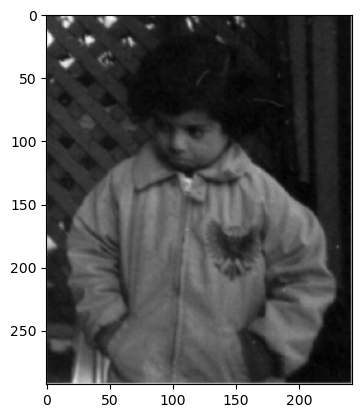

In [28]:
img = cv2.imread('pout.png') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [29]:
s_min = 0 
s_max = 255

In [30]:
r_min = img.min() 
r_max = img.max() 

In [31]:
r_min, r_max

(75, 223)

Eqn for Histogram Stretching

In [32]:
def eqn(r_min, r_max, s_min, s_max): 
  coef = (s_max - s_min)/(r_max - r_min) 
  constant = -(coef*r_min) + s_min 
  return coef, constant 

In [33]:
img

array([[161, 140, 139, ..., 123, 123, 177],
       [140, 107, 108, ...,  84,  85, 164],
       [140, 107, 108, ...,  83,  84, 164],
       ...,
       [133,  98,  99, ...,  83,  84, 164],
       [135,  99,  99, ...,  93,  93, 167],
       [181, 169, 169, ..., 168, 168, 192]], dtype=uint8)

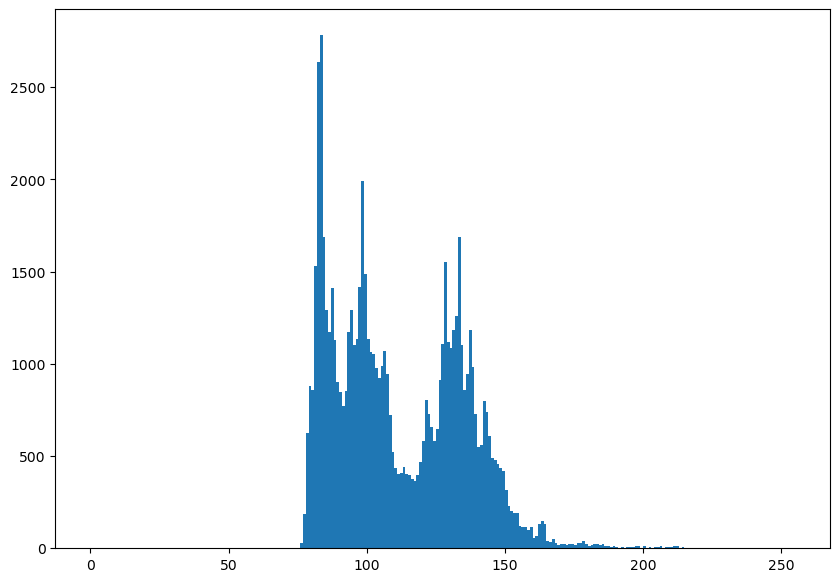

In [34]:
import matplotlib.pyplot as plt
result = img.flatten()
bins = [i for i in range(0, 256)]
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(result, bins=bins) 
plt.show()

In [35]:
import copy 
import numpy as np
img_copy = copy.deepcopy(img)
import math 

In [36]:
old_val = img_copy[img_copy >= r_min] 
set_old_val = set(old_val)  
print(set_old_val)

{75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223}


In [37]:
set_old_val = list(set_old_val) 
print(set_old_val)

[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223]


New values found by equation

In [38]:
set_new_val = []
coef, const = eqn(r_min, r_max, s_min, s_max) 
for i in set_old_val:
  val = coef*i + const 
  val = int(round(val))  
  set_new_val.append(val)

In [39]:
print(set_new_val)

[0, 2, 3, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24, 26, 28, 29, 31, 33, 34, 36, 38, 40, 41, 43, 45, 47, 48, 50, 52, 53, 55, 57, 59, 60, 62, 64, 65, 67, 69, 71, 72, 74, 76, 78, 79, 81, 83, 84, 86, 88, 90, 91, 93, 95, 96, 98, 100, 102, 103, 105, 107, 109, 110, 112, 114, 115, 117, 119, 121, 122, 124, 126, 128, 129, 131, 133, 134, 136, 138, 140, 141, 143, 145, 146, 148, 150, 152, 153, 155, 157, 159, 160, 162, 164, 165, 167, 169, 171, 172, 174, 176, 177, 179, 181, 183, 184, 186, 188, 190, 191, 193, 195, 196, 198, 200, 202, 203, 205, 207, 208, 210, 212, 214, 215, 217, 219, 221, 222, 224, 226, 227, 229, 231, 233, 234, 236, 238, 239, 241, 243, 245, 248, 250, 252, 253, 255]


In [40]:
for i, j in zip(set_old_val, set_new_val): 
  img_copy[img_copy==i] = j

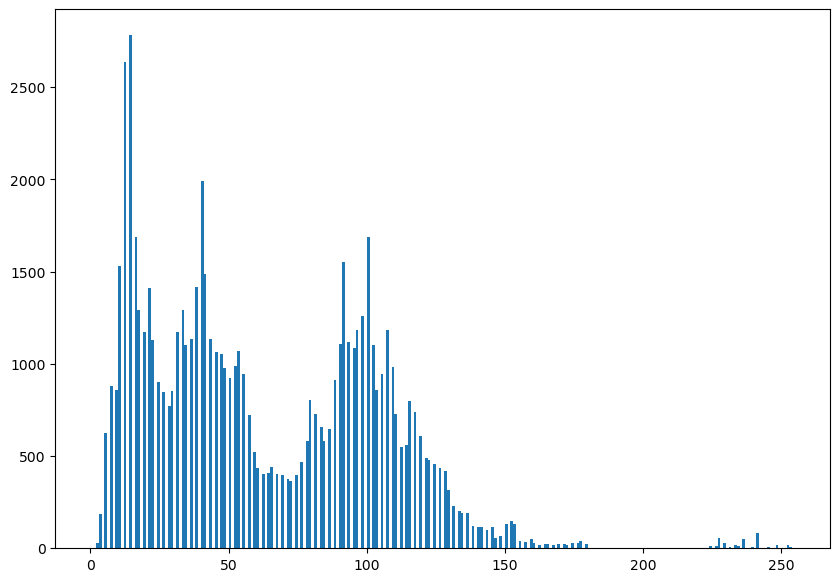

In [41]:
result_op = img_copy.flatten()
bins = [i for i in range(0, 256)]
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(result_op, bins=bins) 
plt.show()

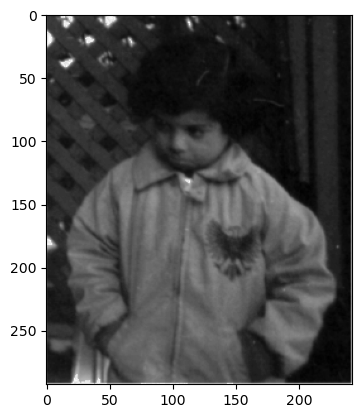

In [42]:
plt.imshow(img_copy, cmap='gray')

In [43]:
img.min(), img.max()

(75, 223)

In [44]:
img_copy.min(), img_copy.max()

(0, 255)

Text(0.5, 1.0, 'Histogram Stretching')

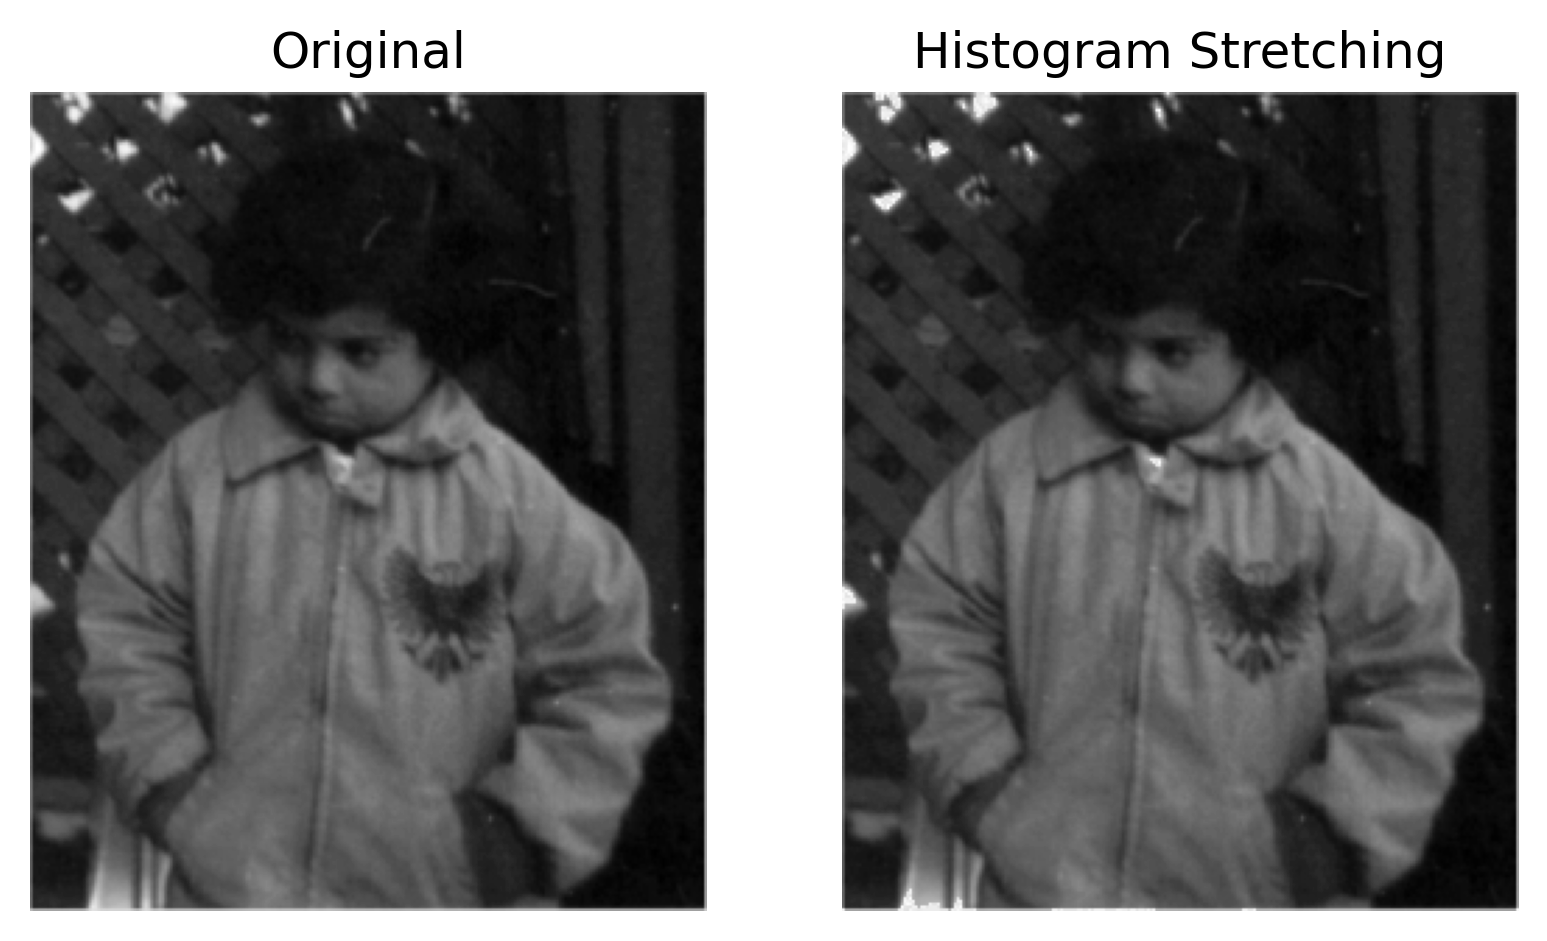

In [45]:
import matplotlib.pyplot as plt

fig=plt.figure(dpi=300)

fig.add_subplot(1,2,1)
# plt.imshow(img,cmap='gray') 
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,2,2)
plt.imshow(img_copy,cmap='gray')
plt.axis("off")
plt.title("Histogram Stretching")